In [16]:
#Implementaion of gridsearch and randomforest ,Linera regression

In [1]:
import pandas as pd # To data analysis and Manipulation
import numpy as np # To carry out the arithmetic
import seaborn as sns # It will allow us to do Statistical Visulization on the Data.
import matplotlib.pyplot as plt


In [2]:
Data = pd.read_csv("house_data.csv")# importing the data from the csv file of Play_tennis.csv
Data.head(10)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built
0,221900.0,3,1.00,1180,5650,1.0,1180,1955
1,538000.0,3,2.25,2570,7242,2.0,2170,1951
2,180000.0,2,1.00,770,10000,1.0,770,1933
3,604000.0,4,3.00,1960,5000,1.0,1050,1965
4,510000.0,3,2.00,1680,8080,1.0,1680,1987
5,257500.0,3,2.25,1715,6819,2.0,1715,1995
6,291850.0,3,1.50,1060,9711,1.0,1060,1963
7,229500.0,3,1.00,1780,7470,1.0,1050,1960
8,323000.0,3,2.50,1890,6560,2.0,1890,2003
9,662500.0,3,2.50,3560,9796,1.0,1860,1965


In [3]:
data=Data.drop("sqft_above",axis=1)

In [4]:
#cheking null value in data set
data.isna().sum()

price          0
bedrooms       0
bathrooms      0
sqft_living    0
sqft_lot       0
floors         0
yr_built       0
dtype: int64

c:\users\manish\appdata\local\programs\python\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='yr_built', ylabel='price'>

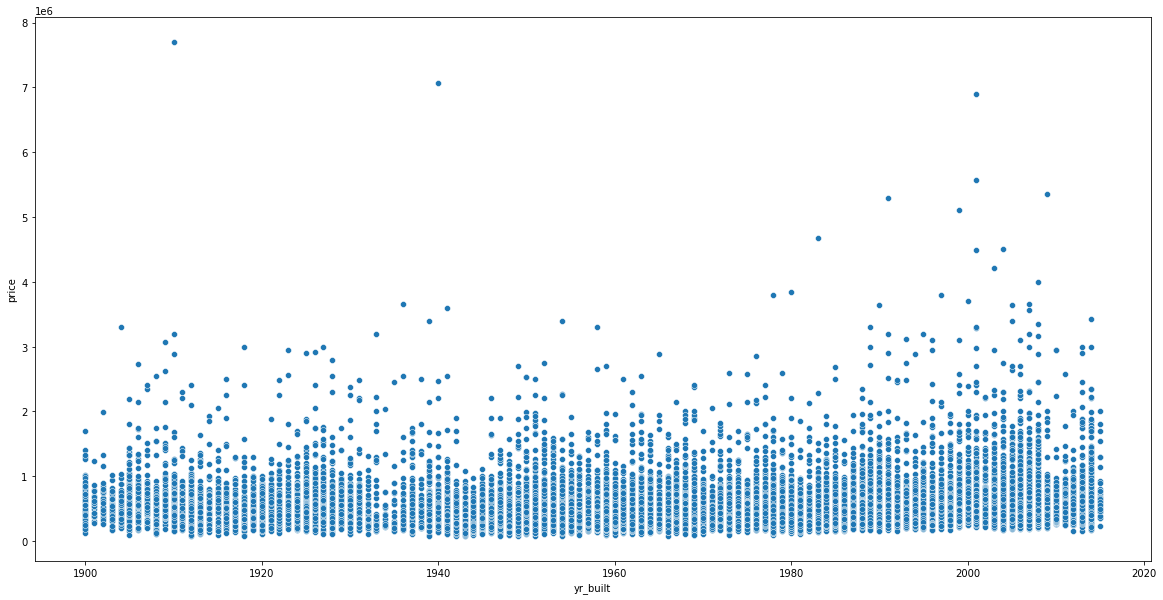

In [5]:
plt.figure(figsize=(20,10))
sns.scatterplot(data['yr_built'],data['price'])

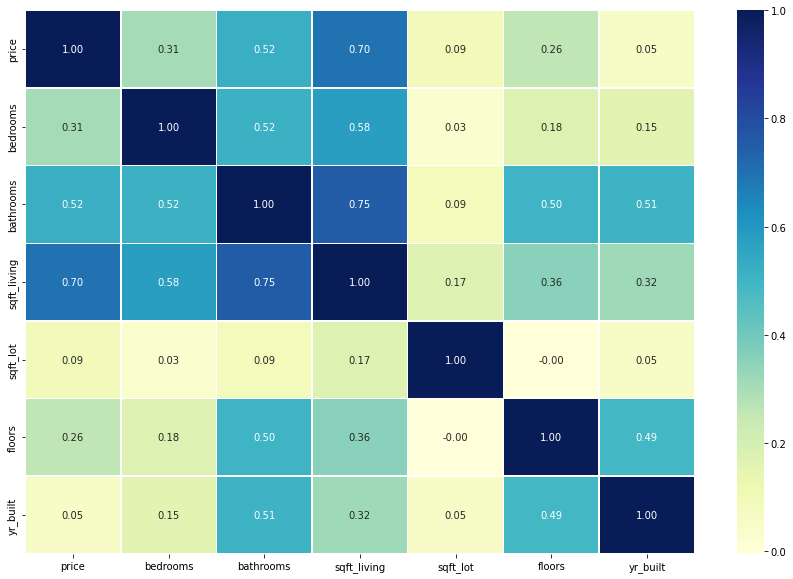

In [6]:
corr = data.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu")

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21575 entries, 0 to 21574
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21575 non-null  float64
 1   bedrooms     21575 non-null  int64  
 2   bathrooms    21575 non-null  float64
 3   sqft_living  21575 non-null  int64  
 4   sqft_lot     21575 non-null  int64  
 5   floors       21575 non-null  float64
 6   yr_built     21575 non-null  int64  
dtypes: float64(3), int64(4)
memory usage: 1.2 MB


In [8]:
data['yr_built'].value_counts() # checking or counting the number of house built in the years

2014    559
2006    453
2005    450
2004    433
2003    422
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: yr_built, Length: 116, dtype: int64

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

In [10]:
feature= data.iloc[:,1:]
feature

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built
0,3,1.00,1180,5650,1.0,1955
1,3,2.25,2570,7242,2.0,1951
2,2,1.00,770,10000,1.0,1933
3,4,3.00,1960,5000,1.0,1965
4,3,2.00,1680,8080,1.0,1987
...,...,...,...,...,...,...
21570,3,2.50,1530,1131,3.0,2009
21571,4,2.50,2310,5813,2.0,2014
21572,2,0.75,1020,1350,2.0,2009
21573,3,2.50,1600,2388,2.0,2004


In [11]:
target = data.iloc[:,:1]
target

,price
0,221900.0
1,538000.0
2,180000.0
3,604000.0
4,510000.0
...,...
21570,360000.0
21571,400000.0
21572,402101.0
21573,400000.0


In [12]:
#spliting the data set into train and text
x_train,x_test,y_train,y_test = train_test_split(feature,target,test_size = 0.35,random_state=43)

In [13]:
#random forest regressor
random_forest = RandomForestRegressor()
random_forest.fit(x_train,y_train)

c:\users\manish\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor()

In [14]:
predict_output = random_forest.predict(x_test)
metrics.r2_score(y_test,predict_output)

0.6008537531109728

In [15]:
#Linera regression 
linear_model = LinearRegression()
linear_model.fit(x_train,y_train)

LinearRegression()

In [16]:
reg_predict = linear_model.predict(x_test)
metrics.r2_score(y_test,reg_predict)

0.554327497049437

In [17]:
# Randomized Search CV for Randomforrest regressor
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
random_search={'n_estimators':[i*100 for i in range(1,13)],
 'max_depth': list(np.linspace(5, 1200, 10, dtype = int)) + [None],
 'max_features': ['auto', 'sqrt','log2', None],
 'min_samples_leaf': [4, 6, 8, 12],
 'min_samples_split': [3, 7, 10, 14],
 'bootstrap':[True, False]
 }
clr = RandomForestRegressor()
modelrfr = RandomizedSearchCV(estimator = clr, param_distributions = random_search, 
 cv = 4, verbose= 5, random_state= 101, n_jobs = -1)
modelrfr.fit(x_train, y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


c:\users\manish\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=4, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 137, 270, 403, 536,
                                                      668, 801, 934, 1067, 1200,
                                                      None],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': [4, 6, 8, 12],
                                        'min_samples_split': [3, 7, 10, 14],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=101, verbose=5)

In [18]:
modelrfr.best_params_

{'n_estimators': 600,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'log2',
 'max_depth': 270,
 'bootstrap': True}

In [19]:
modelrfr.fit(x_train,y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


c:\users\manish\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=4, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 137, 270, 403, 536,
                                                      668, 801, 934, 1067, 1200,
                                                      None],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': [4, 6, 8, 12],
                                        'min_samples_split': [3, 7, 10, 14],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=101, verbose=5)

In [20]:
modelrfr_predict = modelrfr.predict(x_test)

In [21]:
metrics.r2_score(y_test,modelrfr_predict)

0.6246972071318391

In [22]:
grid_search = GridSearchCV(estimator = clr, param_grid = random_search, cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
grid_search.fit(x_train,y_train)
predict_grid = grid_search.predict(x_test)

Fitting 3 folds for each of 16896 candidates, totalling 50688 fits


In [ ]:
metrics.r2_score(y_test,predict_grid)